In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


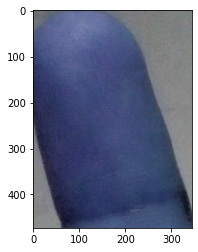

In [2]:
#load image
path = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/Result_1595884474_3/Result_1595884474_3/Result_1595884474_3_211_detected_fingertips_0.jpg"
#path = '/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/Result_1595885260_20200724_181228/Result_1595885260_20200724_181228/Result_1595885260_20200724_181228_108_detected_fingertips_0.jpg' #3
#path = "/home/lattard/PROJECTS/DATA/fingertip/skin/finger_1.jpg"
#path = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/Result_1595884474_3/Result_1595884474_3/Result_1595884474_3_211_detected_fingertips_0.jpg" #2
#path = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/Result_1595884474_3/Result_1595884474_3/Result_1595884474_3_268_detected_fingertips_0.jpg" #1
rgb_frame = cv2.imread(path)
plt.imshow(rgb_frame)

# Extract finger by skin colour

In [3]:
#skin color range boundaries of the HSV pixel
skin_col_low = np.array([0, 48, 80], dtype="uint8")
skin_col_high = np.array([20, 255, 255], dtype="uint8")


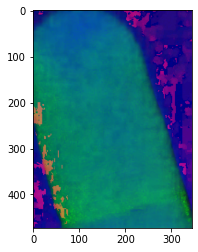

In [4]:
converted = cv2.cvtColor(rgb_frame, cv2.COLOR_BGR2HSV)
plt.imshow(converted)

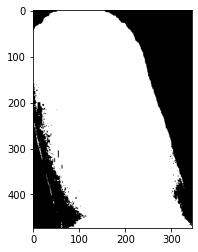

In [5]:
#filter the image to get the skin area
skin_mask = cv2.inRange(converted, skin_col_low, skin_col_high)
plt.imshow(skin_mask, cmap='gray')

# Extracting foreground

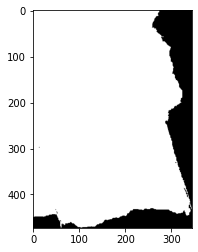

In [6]:
h, w = rgb_frame.shape[:2]

# ROI containing a segmented object. The pixels outside of the ROI are marked as obvious background.
# The parameter is only used when mode==GC_INIT_WITH_RECT
#roi = (x, y, half_square_dim*2, half_square_dim*2)
roi = (0,0, w-1, h-1)


mask = np.zeros(rgb_frame.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
(mask, bgModel, fgModel) = cv2.grabCut(rgb_frame, mask, roi, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)

# using the mask from grabcut to filter out the background
fg_mask = np.where((mask==cv2.GC_BGD)|(mask==cv2.GC_PR_BGD),0,1).astype('uint8')
fg_mask = (fg_mask * 255).astype("uint8")
plt.imshow(fg_mask, cmap='gray')
output = cv2.bitwise_and(rgb_frame, rgb_frame, mask=fg_mask)
#plt.imshow(output)topmost = tuple(cnt[cnt[:,:,1].argmin()][0])

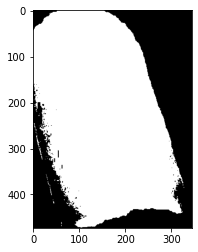

In [7]:
fused_mask = cv2.bitwise_and(skin_mask, fg_mask) 
plt.imshow(fused_mask, cmap = 'gray')
 

In [8]:
h,w = rgb_frame.shape[:2]
print ('h:', h)
print ('w:', w)

h: 473
w: 345


In [9]:
contours,_ = cv2.findContours(fused_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
max_area = 0
max_c = None
for i, c in enumerate(contours):
    # Calculate the area of each contour
    area = cv2.contourArea(c)
    if max_area<area :
        max_area = area
        max_c = c

(x,y),(MA,ma),angle = cv2.fitEllipse(max_c)
topmost = tuple(max_c[max_c[:,:,1].argmin()][0])
leftmost = tuple(max_c[max_c[:,:,0].argmin()][0])
rightmost = tuple(max_c[max_c[:,:,0].argmax()][0])
print("Area:", max_area)
print("Angle:", angle)
print("Topmost point", topmost)
print("Leftmost point", leftmost)
print("Rightmost point", rightmost)


disp = rgb_frame.copy()
cv2.drawContours(disp, max_c, -1, (0,255,0), 3)
cv2.imshow("hello",disp)
cv2.waitKey(0)

Area: 107696.0
Angle: 162.4512176513672
Topmost point (52, 0)
Leftmost point (0, 44)
Rightmost point (325, 375)


13

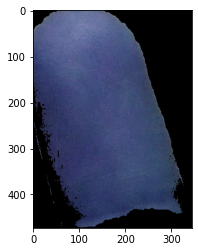

In [10]:
output = cv2.bitwise_and(rgb_frame, rgb_frame, mask=fused_mask)
plt.imshow(output)